In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data_df = pd.read_csv("Cust_Spend_Data_New.csv")

In [36]:
data_df.head(10)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17
5,6,Aide,3039,21,1,8,12
6,7,Alex,4676,22,3,8,13
7,8,Alexandria,7869,14,6,3,3
8,9,Alline,5585,21,2,10,12
9,10,Allyn,4589,23,2,8,9


In [37]:
data_df.shape

(829, 7)

In [38]:
data_df.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [40]:
data_df.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,415.000000,4801.276236,17.856454,3.961399,7.623643,8.338963
std,239.455981,2056.494189,4.367192,2.056204,3.665773,4.250284
min,1.000000,549.000000,2.000000,0.000000,1.000000,0.000000
25%,208.000000,4156.000000,15.000000,3.000000,6.000000,5.000000
50%,415.000000,4516.000000,18.000000,4.000000,7.000000,8.000000
75%,622.000000,4910.000000,20.000000,5.000000,8.000000,10.000000
max,829.000000,10000.000000,29.000000,10.000000,19.000000,20.000000


In [41]:
data_df.duplicated().sum()

0

In [42]:
cust_df = data_df.drop(['Name','Cust_ID'], axis=1)

In [43]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X = StandardScaler()

In [46]:
scaled_df = X.fit_transform(cust_df)

In [47]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [48]:
k_means = KMeans(n_clusters = 3)

In [49]:
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [51]:
k_means.inertia_

1074.3823802989516

In [52]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

1074.3823802989516

In [53]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

909.4453294086201

In [54]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

784.5887748781103

In [55]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

697.82654404672

In [56]:
wss =[] 

In [60]:
for i in range(2,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [61]:
wss

[2225.818078099467,
 1074.3823802989516,
 909.4453294086201,
 784.5624359391796,
 697.7964308882446,
 630.0985175084348,
 580.9947566603463,
 539.4240814190958,
 520.5705679087149]

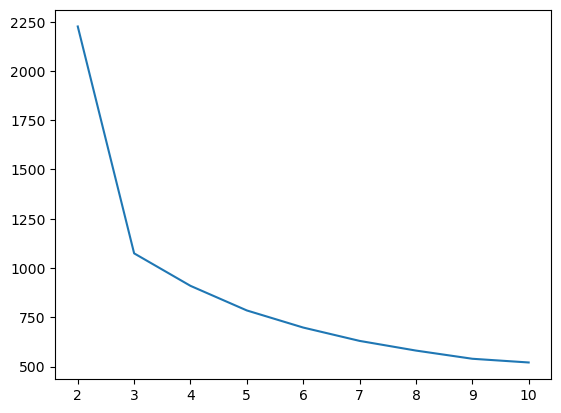

In [64]:
plt.plot(range(2,11), wss)

In [65]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [66]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans
0,1,Abraham,1123,28,1,16,14,1
1,2,Adela,9818,13,5,2,5,2
2,3,Adelina,9824,10,10,2,2,2
3,4,Adrian,3097,23,2,8,9,0
4,5,Adrianna,817,28,1,17,17,1


In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [68]:
silhouette_score(scaled_df,labels)

0.5863370901372584

In [69]:
sil_width = silhouette_samples(scaled_df,labels)

In [70]:
data_df["sil_width"] = sil_width
data_df.head(5)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,1,0.656055
1,2,Adela,9818,13,5,2,5,2,0.512424
2,3,Adelina,9824,10,10,2,2,2,0.582380
3,4,Adrian,3097,23,2,8,9,0,0.375197
4,5,Adrianna,817,28,1,17,17,1,0.703167


In [71]:
silhouette_samples(scaled_df,labels).min() 

0.04131038567750352